In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# poll_data = pd.read_csv(
#     "../../data/mlcourse_open_first_survey_parsed.csv", index_col="id"
# )
poll_data = pd.read_csv('https://github.com/Yorko/mlcourse.ai/raw/main/data/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [4]:
poll_data.head(2)

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [5]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                 2944 non-null   object 
 1   Представьтесь в 2-3 фразах                                                                                                                2944 non-null   object 
 2   Работали ли Вы с Jupyter notebooks?                                                                                                       2931 non-null   object 
 3   Что Вы ждете от курса?                               

In [6]:
poll_data.shape

(2944, 14)

**Переименуем признаки.**

In [7]:
rename_dic = dict(
    zip(
        poll_data.columns,
        [
            "time",
            "intro",
            "jupyter",
            "expect",
            "sport",
            "personal",
            "math_level",
            "quest1",
            "quest2",
            "quest3",
            "fib_gen",
            "python",
            "github",
            "movie",
        ],
    )
)

In [8]:
poll_data.rename(columns=rename_dic, inplace=True)

In [9]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [10]:
poll_data["jupyter"].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [11]:
jupyer_levels = poll_data["jupyter"].map({"Да": 1, "Нет": 0}).fillna(2)

In [12]:
jupyer_levels.head()

id
0    1.0
1    1.0
2    1.0
3    1.0
5    1.0
Name: jupyter, dtype: float64

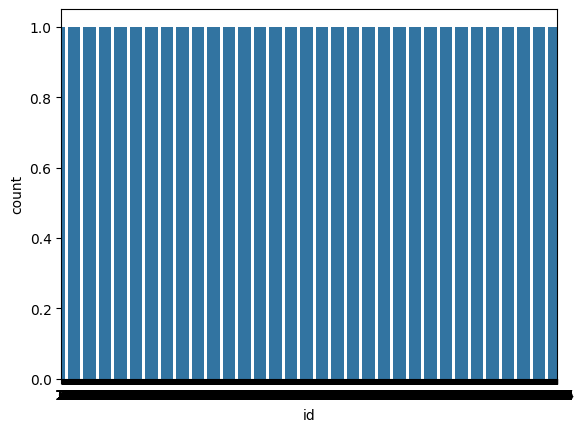

In [13]:
sns.countplot(jupyer_levels);

In [14]:
poll_data.columns

Index(['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level',
       'quest1', 'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie'],
      dtype='object')

In [15]:
poll_data.sport.value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

**Процент ответивших на 3 вопрос**

In [16]:
(poll_data["quest3"] == 2).dropna().sum() / poll_data["quest3"][
    ~poll_data["quest3"].isnull()
].shape[0]

0.9244036697247706

**Ищем топ-10 слов в представлении себя. При этом уберем стоп-слова**

In [17]:
all_words = np.concatenate(poll_data["intro"].apply(lambda s: s.strip().split()).values)

In [18]:
len(all_words)

26533

In [19]:
import nltk

In [20]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
nltk.corpus.stopwords.words("russian")[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [22]:
words_series = pd.Series(list(all_words))
words_series[
    ~words_series.isin(nltk.corpus.stopwords.words("russian"))
].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64